In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Load the datasets
df_2021_free = pd.read_csv('q2_2021_free_plan.csv')
df_2021_paid = pd.read_csv('q2_2021_paid_subscribers.csv')
df_2022_free = pd.read_csv('q2_2022_free_plan.csv')
df_2022_paid = pd.read_csv('q2_2022_paid_subscribers.csv')




In [25]:
# Function to plot KDE
def plot_kde(df, title):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df['minutes_watched'], fill=True, color='blue')
    plt.title(title)
    plt.xlabel('Minutes Watched')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

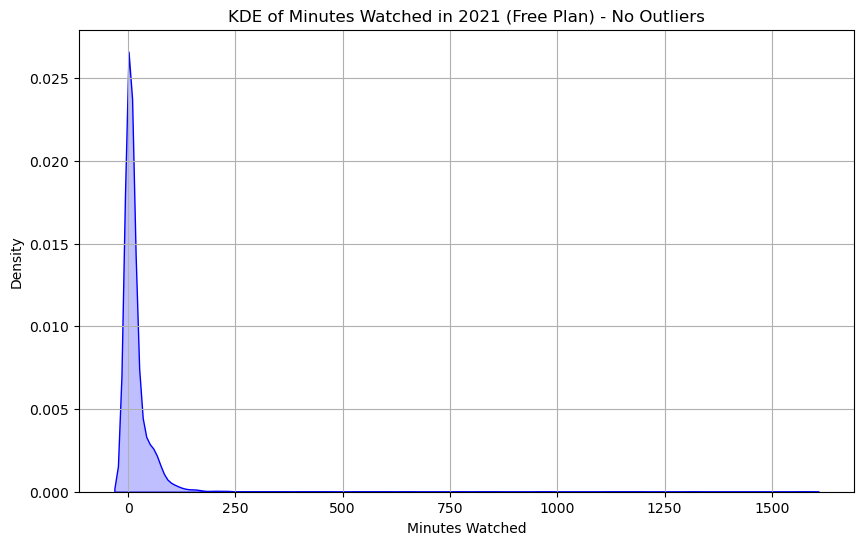

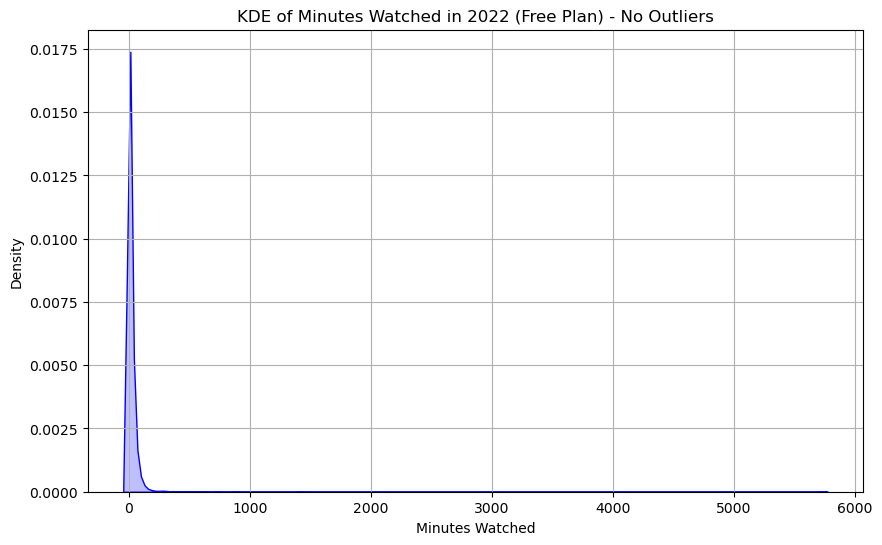

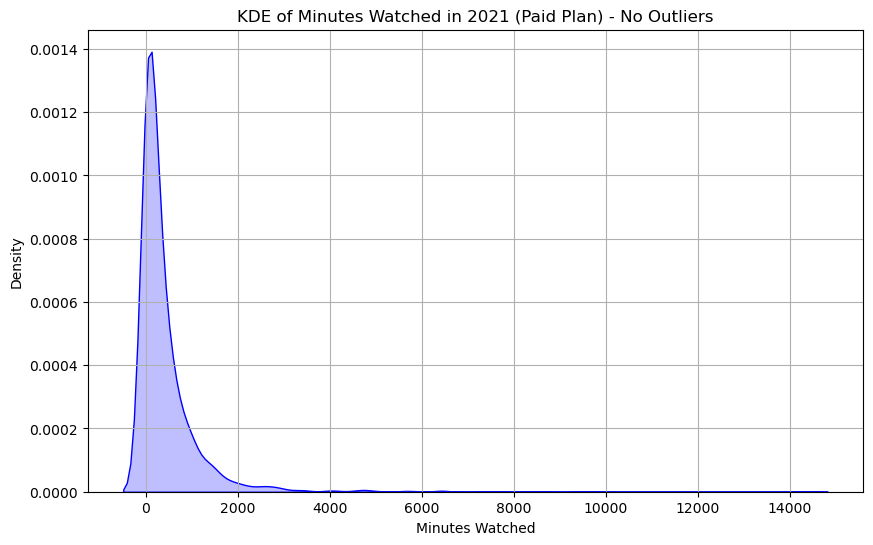

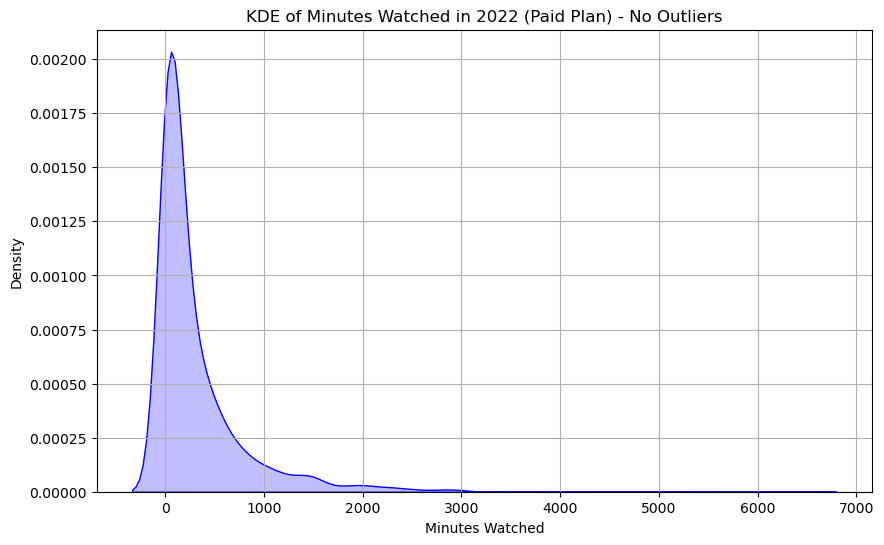

In [26]:
# Plot KDE for each raw version of dataset
plot_kde(df_2021_free, 'KDE of Minutes Watched in 2021 (Free Plan) - No Outliers')
plot_kde(df_2022_free, 'KDE of Minutes Watched in 2022 (Free Plan) - No Outliers')
plot_kde(df_2021_paid, 'KDE of Minutes Watched in 2021 (Paid Plan) - No Outliers')
plot_kde(df_2022_paid, 'KDE of Minutes Watched in 2022 (Paid Plan) - No Outliers')

In [27]:
# Function to remove outliers and save the filtered data
def remove_outliers_and_save(df, filename):
    # Calculate the 99th percentile
    percentile_99 = df['minutes_watched'].quantile(0.99)

    # Filter the DataFrame to keep values below the 99th percentile
    df_filtered = df[df['minutes_watched'] < percentile_99]

    # Save the filtered DataFrame to a CSV file
    df_filtered.to_csv(filename, index=False)

# Process each dataset
remove_outliers_and_save(df_2021_free, 'minutes_watched_2021_paid_0_no_outliers.csv')
remove_outliers_and_save(df_2022_free, 'minutes_watched_2022_paid_0_no_outliers.csv')
remove_outliers_and_save(df_2021_paid, 'minutes_watched_2021_paid_1_no_outliers.csv')
remove_outliers_and_save(df_2022_paid, 'minutes_watched_2022_paid_1_no_outliers.csv')

In [28]:
# Load the filtered datasets
df_2021_paid_0 = pd.read_csv('minutes_watched_2021_paid_0_no_outliers.csv')
df_2022_paid_0 = pd.read_csv('minutes_watched_2022_paid_0_no_outliers.csv')
df_2021_paid_1 = pd.read_csv('minutes_watched_2021_paid_1_no_outliers.csv')
df_2022_paid_1 = pd.read_csv('minutes_watched_2022_paid_1_no_outliers.csv')

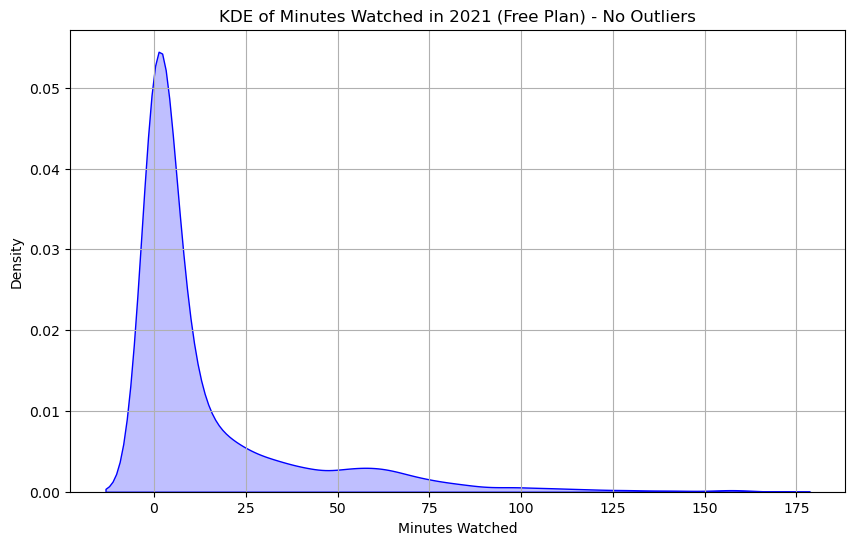

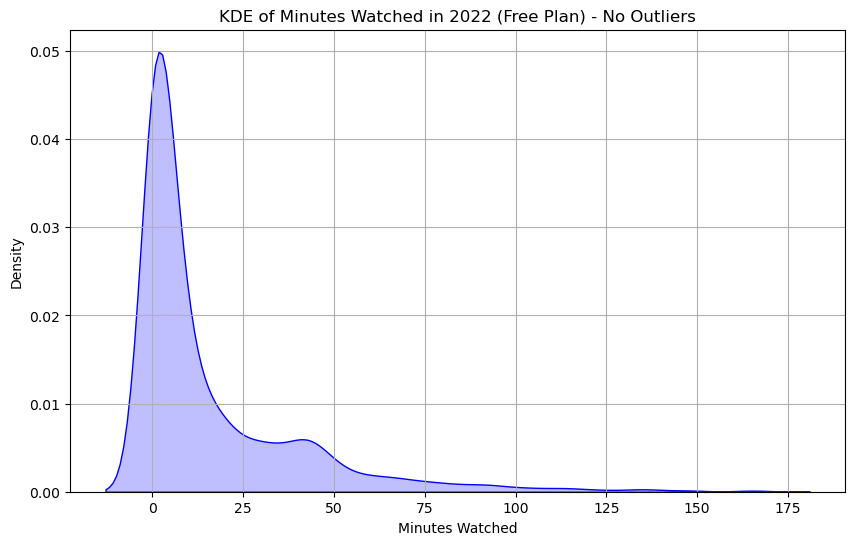

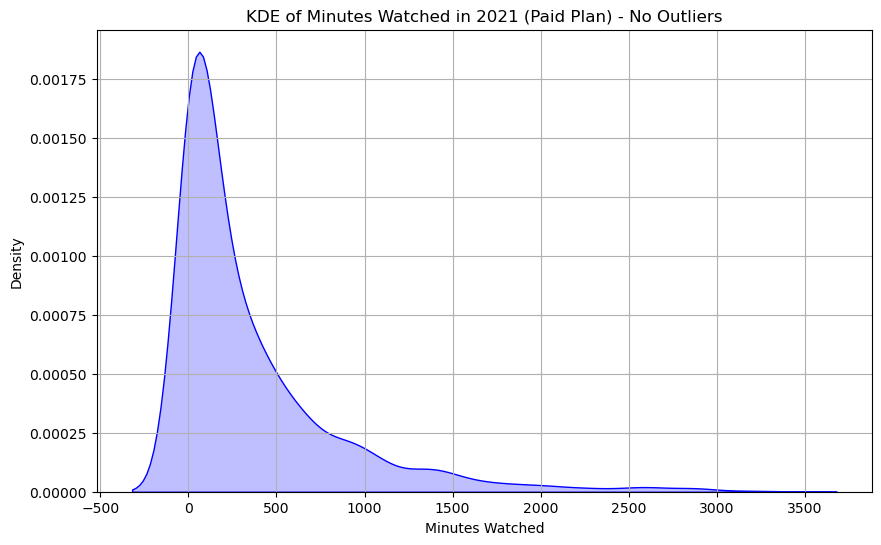

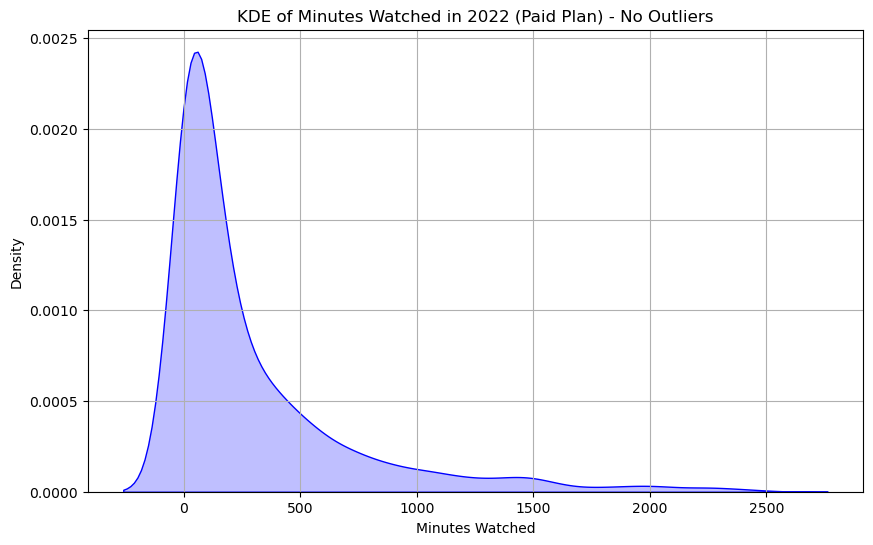

In [29]:
# Plot KDE for each filtered dataset
plot_kde(df_2021_free_filtered, 'KDE of Minutes Watched in 2021 (Free Plan) - No Outliers')
plot_kde(df_2022_free_filtered, 'KDE of Minutes Watched in 2022 (Free Plan) - No Outliers')
plot_kde(df_2021_paid_filtered, 'KDE of Minutes Watched in 2021 (Paid Plan) - No Outliers')
plot_kde(df_2022_paid_filtered, 'KDE of Minutes Watched in 2022 (Paid Plan) - No Outliers')

In [30]:
# Calculate mean and median
mean_median_2021_paid_0 = df_2021_paid_0['minutes_watched'].agg(['mean', 'median'])
mean_median_2022_paid_0 = df_2022_paid_0['minutes_watched'].agg(['mean', 'median'])
mean_median_2021_paid_1 = df_2021_paid_1['minutes_watched'].agg(['mean', 'median'])
mean_median_2022_paid_1 = df_2022_paid_1['minutes_watched'].agg(['mean', 'median'])

mean_median_2021_paid_0, mean_median_2022_paid_0, mean_median_2021_paid_1, mean_median_2022_paid_1

(mean      14.208284
 median     2.790000
 Name: minutes_watched, dtype: float64,
 mean      16.035961
 median     4.980000
 Name: minutes_watched, dtype: float64,
 mean      360.103801
 median    161.930000
 Name: minutes_watched, dtype: float64,
 mean      292.220979
 median    119.750000
 Name: minutes_watched, dtype: float64)

### Next, we'll calculate the 95% confidence intervals for each group.

In [31]:
from scipy import stats

def calculate_confidence_interval(data):
    n = len(data)
    mean = data.mean()
    std_error = stats.sem(data)
    margin_of_error = stats.t.ppf(1 - 0.025, n - 1) * std_error
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

ci_2021_paid_0 = calculate_confidence_interval(df_2021_paid_0['minutes_watched'])
ci_2022_paid_0 = calculate_confidence_interval(df_2022_paid_0['minutes_watched'])
ci_2021_paid_1 = calculate_confidence_interval(df_2021_paid_1['minutes_watched'])
ci_2022_paid_1 = calculate_confidence_interval(df_2022_paid_1['minutes_watched'])

ci_2021_paid_0, ci_2022_paid_0, ci_2021_paid_1, ci_2022_paid_1


((13.547921527068967, 14.868646654749218),
 (15.414688500640791, 16.657233421281127),
 (339.58970187141244, 380.6179000575661),
 (276.5324303774221, 307.9095275631146))

### F-Test for Equal Variances: Before conducting the t-test, we perform an F-test to compare
### the variances of the two samples. If the F-test indicates that the variances are significantly
### different, we should use the unequal variances assumption.

In [32]:
from scipy import stats

# F-test for free-plan students
f_stat_free, p_value_f_free = stats.levene(df_2021_paid_0['minutes_watched'], df_2022_paid_0['minutes_watched'])

# F-test for paying students
f_stat_paid, p_value_f_paid = stats.levene(df_2021_paid_1['minutes_watched'], df_2022_paid_1['minutes_watched'])

f_stat_free, p_value_f_free, f_stat_paid, p_value_f_paid


(7.474685809885568,
 0.006267017313659368,
 25.959660061521728,
 3.613572126476103e-07)

### Free-Plan Students (Equal Variances)

In [36]:
# Two-sample t-test for free-plan students
t_stat_free, p_value_free = stats.ttest_ind(df_2022_paid_0['minutes_watched'],
                                             df_2021_paid_0['minutes_watched'],
                                             equal_var=True)
t_stat_free, p_value_free


(3.9511503185030445, 7.825061764693885e-05)

### Paying Students (Unequal Variances)

In [37]:
# Two-sample t-test for paying students
t_stat_paid, p_value_paid = stats.ttest_ind(df_2022_paid_1['minutes_watched'],
                                             df_2021_paid_1['minutes_watched'],
                                             equal_var=False)
t_stat_paid, p_value_paid


(-5.154355290398146, 2.6549976892061083e-07)

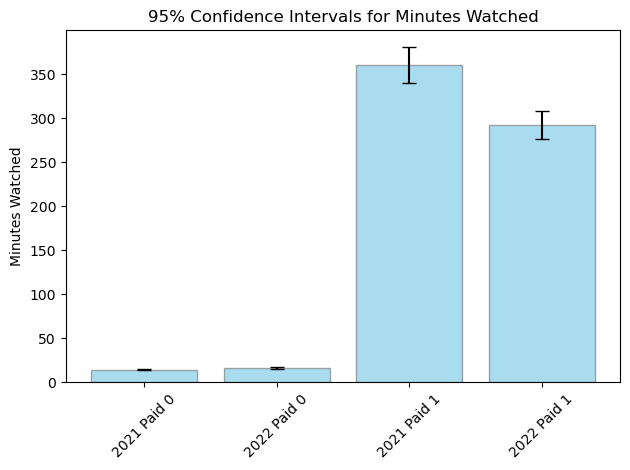

In [35]:
import matplotlib.pyplot as plt

# Data for plotting
groups = ['2021 Paid 0', '2022 Paid 0', '2021 Paid 1', '2022 Paid 1']
means = [mean_median_2021_paid_0['mean'], mean_median_2022_paid_0['mean'],
         mean_median_2021_paid_1['mean'], mean_median_2022_paid_1['mean']]
cis = [ci_2021_paid_0, ci_2022_paid_0, ci_2021_paid_1, ci_2022_paid_1]

# Plotting
fig, ax = plt.subplots()
ax.bar(groups, means, yerr=[[m - l for m, (l, u) in zip(means, cis)],
                             [u - m for m, (l, u) in zip(means, cis)]],
       capsize=5, color='skyblue', alpha=0.7, edgecolor='grey')
ax.set_ylabel('Minutes Watched')
ax.set_title('95% Confidence Intervals for Minutes Watched')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### analyzing the correlation between minutes watched and number of certificates

In [38]:
# Load the dataset
file_path = 'certificates_issued_minutes_watched.csv'
df = pd.read_csv(file_path)

In [40]:
correlation_coefficient = df['minutes_watched'].corr(df['certificates_issued'])
correlation_coefficient

0.5126151142088898

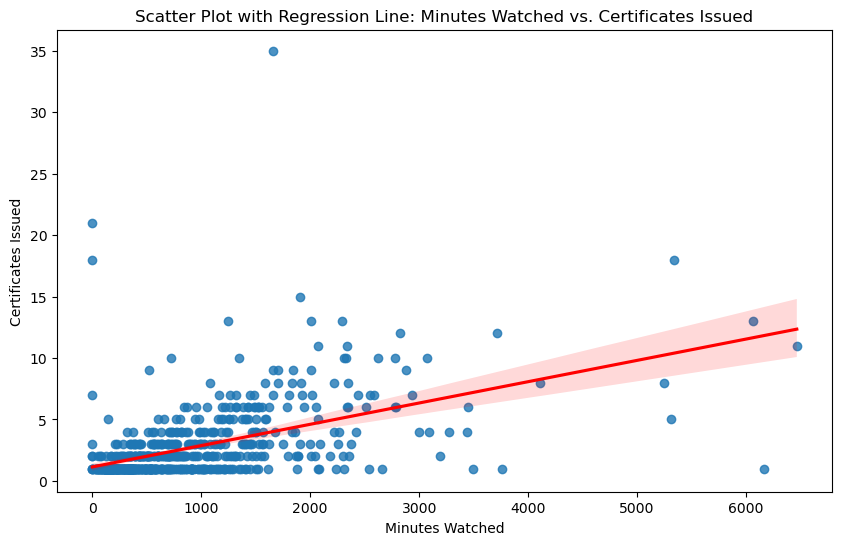

In [39]:
# Create a scatter plot with a regression line using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='minutes_watched', y='certificates_issued', data=df, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: Minutes Watched vs. Certificates Issued')
plt.xlabel('Minutes Watched')
plt.ylabel('Certificates Issued')
plt.show()

### Linear Regression 

In [41]:
# Load the dataset
file_path = 'certificates_issued_minutes_watched.csv'
raw_data = pd.read_csv(file_path)

# Create a copy of the data to avoid modifying the original dataset
data = raw_data.copy()

# Preview the data
data.head()


,student_id,minutes_watched,certificates_issued
0,4640,586.80,1
1,5836,1903.12,3
2,801,6066.00,13
3,2022,115.37,1
4,6278,2181.32,2


In [43]:
X = data[['minutes_watched']]  # Feature: minutes watched
y = data['certificates_issued']  # Target: certificates issued

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

In [45]:
from sklearn.linear_model import LinearRegression
# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [46]:
# Extract the slope (m) and y-intercept (b)
m = model.coef_[0]
b = model.intercept_

print(f"The linear equation is: y = {m:.4f}x + {b:.4f}")

The linear equation is: y = 0.0017x + 1.2165


In [48]:
# Calculation of the R-squared value
r_squared = model.score(X_train, y_train)

print(f"R-squared: {r_squared:.4f}")
### The R-squared value indicates the proportion of variance in the target variable that is predictable from the input variable


R-squared: 0.2334


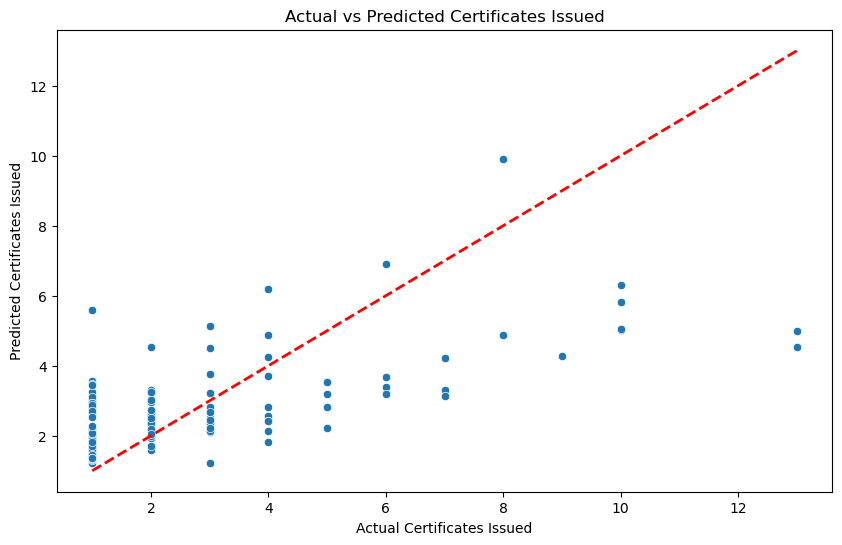

In [52]:
# prediction on the test data
y_pred = model.predict(X_test)

# Creating a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Certificates Issued')
plt.xlabel('Actual Certificates Issued')
plt.ylabel('Predicted Certificates Issued')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Diagonal line for reference
plt.show()
